In [1]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import sympy  as sp
import seaborn as sns
from tqdm import tqdm

In [7]:

def func(x, gamma, w, I, b, n, k):
    def sig(x, n, k):
        return 1 / (1 + np.exp(n * (k - x)))

    xy = x
    return [-gamma[0] * xy[0] - sig(xy[1], n, k) * w[0] + I[0] + b[0],
            -gamma[1] * xy[1] - sig(xy[0], n, k) * w[1] + I[1] + b[1]]


def Energy(x, y):
    # n = 2.
    # k = 7.
    # gamma = np.array([0.5,0.5])
    # I = np.array([0.,0.])
    # b = np.array([5.5,5.5])
    # w = np.array([4., 4.])
    sx = np.exp(n * k) + np.exp(n * x)
    sy = np.exp(n * k) + np.exp(n * y)
    f1 = gamma[0] * (x * np.exp(n * x) / sx - np.log(sx) / n) + gamma[1] * (y * np.exp(n * y) / sy - np.log(sy) / n)
    f2 = -(I[0] + b[0]) * np.exp(n * x) / sx - (I[1] + b[1]) * np.exp(n * y) / sy
    f3 = 0.5 * (w[0] + w[1]) * (np.exp(n * x) / sx) * (np.exp(n * y) / sy)
    return f1 + f2 + f3

if __name__ == '__main__':
    dim = 2
    gamma = np.ones(dim) * 0.5
    w = np.ones(dim) * 4.
    I = np.ones(dim) * 0. # input
    b = np.ones(dim) * 5.75
    n = 1.5
    k = 7.
    p_list = []
    sigma = np.array([2.**2, 0.5**2])
    for gi in tqdm(np.arange(0.1,0.8,0.02)):
        p_tmp = []
        for ki in np.arange(3,16.1,0.1): 
            k = ki
            gamma = np.ones(dim) * gi
            x, y = sp.symbols('x y')
            root1 = fsolve(func, x0=np.array([20, 0]), args=(gamma, w, I, b, n, k))
            root2 = fsolve(func, x0=np.array([0, 20]), args=(gamma, w, I, b, n, k))
            root3 = fsolve(func, x0=np.array([7, 7]), args=(gamma, w, I, b, n, k))
            sx = sp.exp(n * k) + sp.exp(n * x)
            sy = sp.exp(n * k) + sp.exp(n * y)
            f1 = gamma[0] * (x * sp.exp(n * x) / sx - sp.log(sx) / n) + gamma[1] * (
                        y * sp.exp(n * y) / sy - sp.log(sy) / n)
            f2 = -(I[0] + b[0]) * sp.exp(n * x) / sx - (I[1] + b[1]) * sp.exp(n * y) / sy
            f3 = 0.5 * (w[0] + w[1]) * (sp.exp(n * x) / sx) * (sp.exp(n * y) / sy)
            f = f1 + f2 + f3
            fx = sp.diff(f, x)
            fxx = sp.diff(fx, x)
            fxy = sp.diff(fx, y)
            fy = sp.diff(f, y)
            fyx = sp.diff(fy, x)
            fyy = sp.diff(fy, y)
            Tr_HN = fxx * sigma[0] + fyy * sigma[1]
            Tr_H = fxx + fyy
            d_E1 = f.subs([(x, root1[0]), (y, root1[1])]) - f.subs([(x, root3[0]), (y, root3[1])])
            d_E2 = f.subs([(x, root2[0]), (y, root2[1])]) - f.subs([(x, root3[0]), (y, root3[1])])
            # H = np.matrix([[fxx, fxy],[fyx, fyy]])
            Tr_HN_x = Tr_HN.subs([(x, root1[0]), (y, root1[1])])
            Tr_HN_y = Tr_HN.subs([(x, root2[0]), (y, root2[1])])
            Tr_H_x = Tr_H.subs([(x, root1[0]), (y, root1[1])])
            Tr_H_y = Tr_H.subs([(x, root2[0]), (y, root2[1])])
            # print(Tr_x)
            p1 = 1 / (1 + np.exp(float((d_E1 * 2 / Tr_HN_x - d_E2 * 2 / Tr_HN_y) * Tr_H_x)))
            # p2 = 1 / (1 + np.exp(float((d_E2 * 2 / Tr_HN_y - d_E1 * 2 / Tr_HN_x) * Tr_H_y)))
            p_tmp.append(p1)

        p_list.append(p_tmp)
    p_list = np.array(p_list,dtype=float)
    np.save('saved2/P_gamma_k_cal_0_2.npy',p_list)


100%|██████████| 35/35 [09:26<00:00, 16.19s/it]


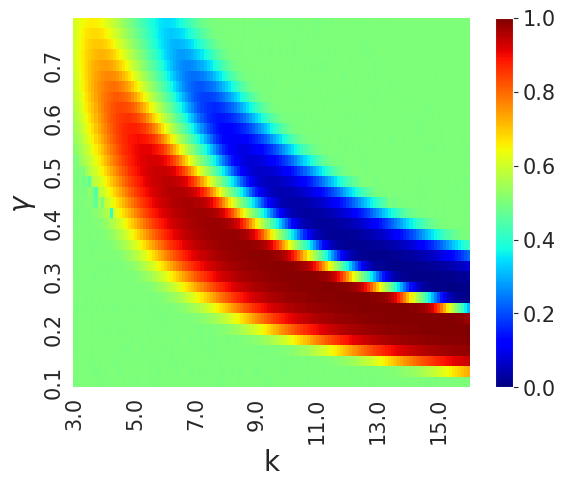

In [7]:
    p_list = np.load('saved2/P_gamma_k_cal_0_2.npy')
    h = sns.heatmap(data=p_list,cmap='jet',cbar=False,vmax=1,vmin=0)
    cb = h.figure.colorbar(h.collections[0])
    cb.ax.tick_params(labelsize=15)
    plt.xticks(np.arange(0.5, 131.5, 20), np.arange(3, 16.1, 2).round(2), fontsize=8)
    plt.yticks(np.arange(0.5, 35.5, 5), np.arange(0.1, 0.8, 0.1).round(2), fontsize=8)
    plt.xlabel('k', fontsize=20)
    plt.ylabel('$\gamma$', fontsize=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.gca().invert_yaxis()
    plt.show()